In [2]:
import joblib
import pandas as pd
import pycaret.classification as pyc
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Preprocessing data

In [4]:
data = pd.read_csv('../heart.csv')
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
#Identifying Categorical and Numerical Columns
general_info = data.info()
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
#We have 6 numerical columns and 6 categorical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [15]:
print(data["RestingECG"].unique())

['Normal' 'ST' 'LVH']


In [5]:
na_per_column = data.isnull().sum()
print(na_per_column)
#We don't have any null data, so let's proceed with the analysis!

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [6]:
statistical_description = data.describe()
print(statistical_description)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [7]:
categorical = data.select_dtypes(include=['object'])
counter_unique_values = categorical.nunique()
print(counter_unique_values)

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64


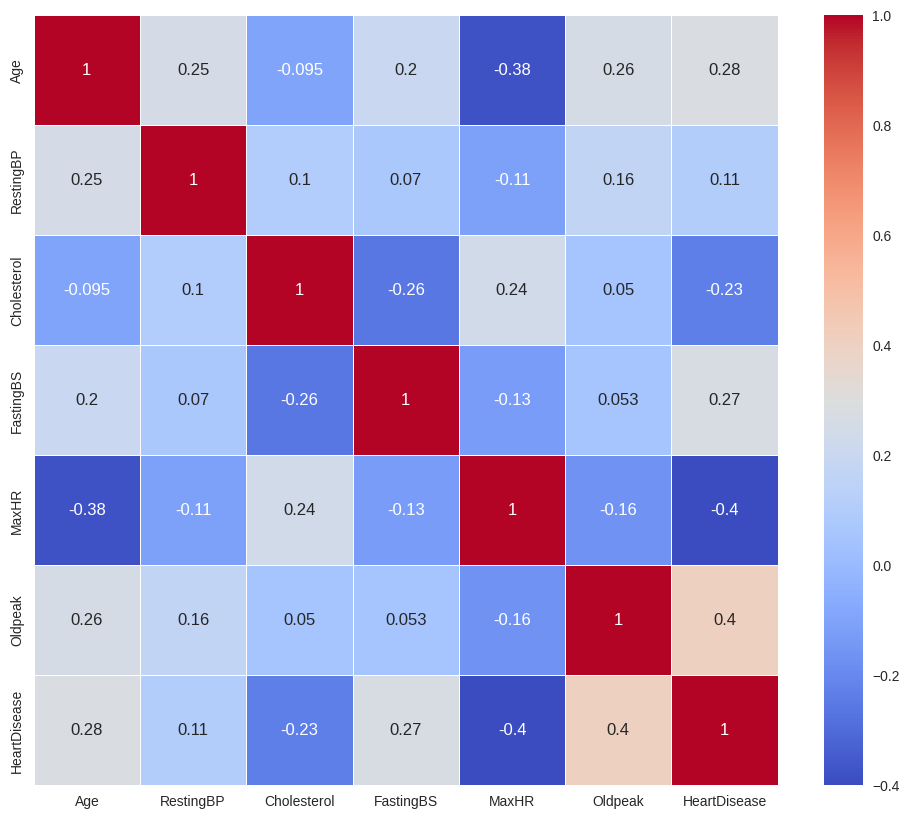

In [8]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()
#Correlation Matrix

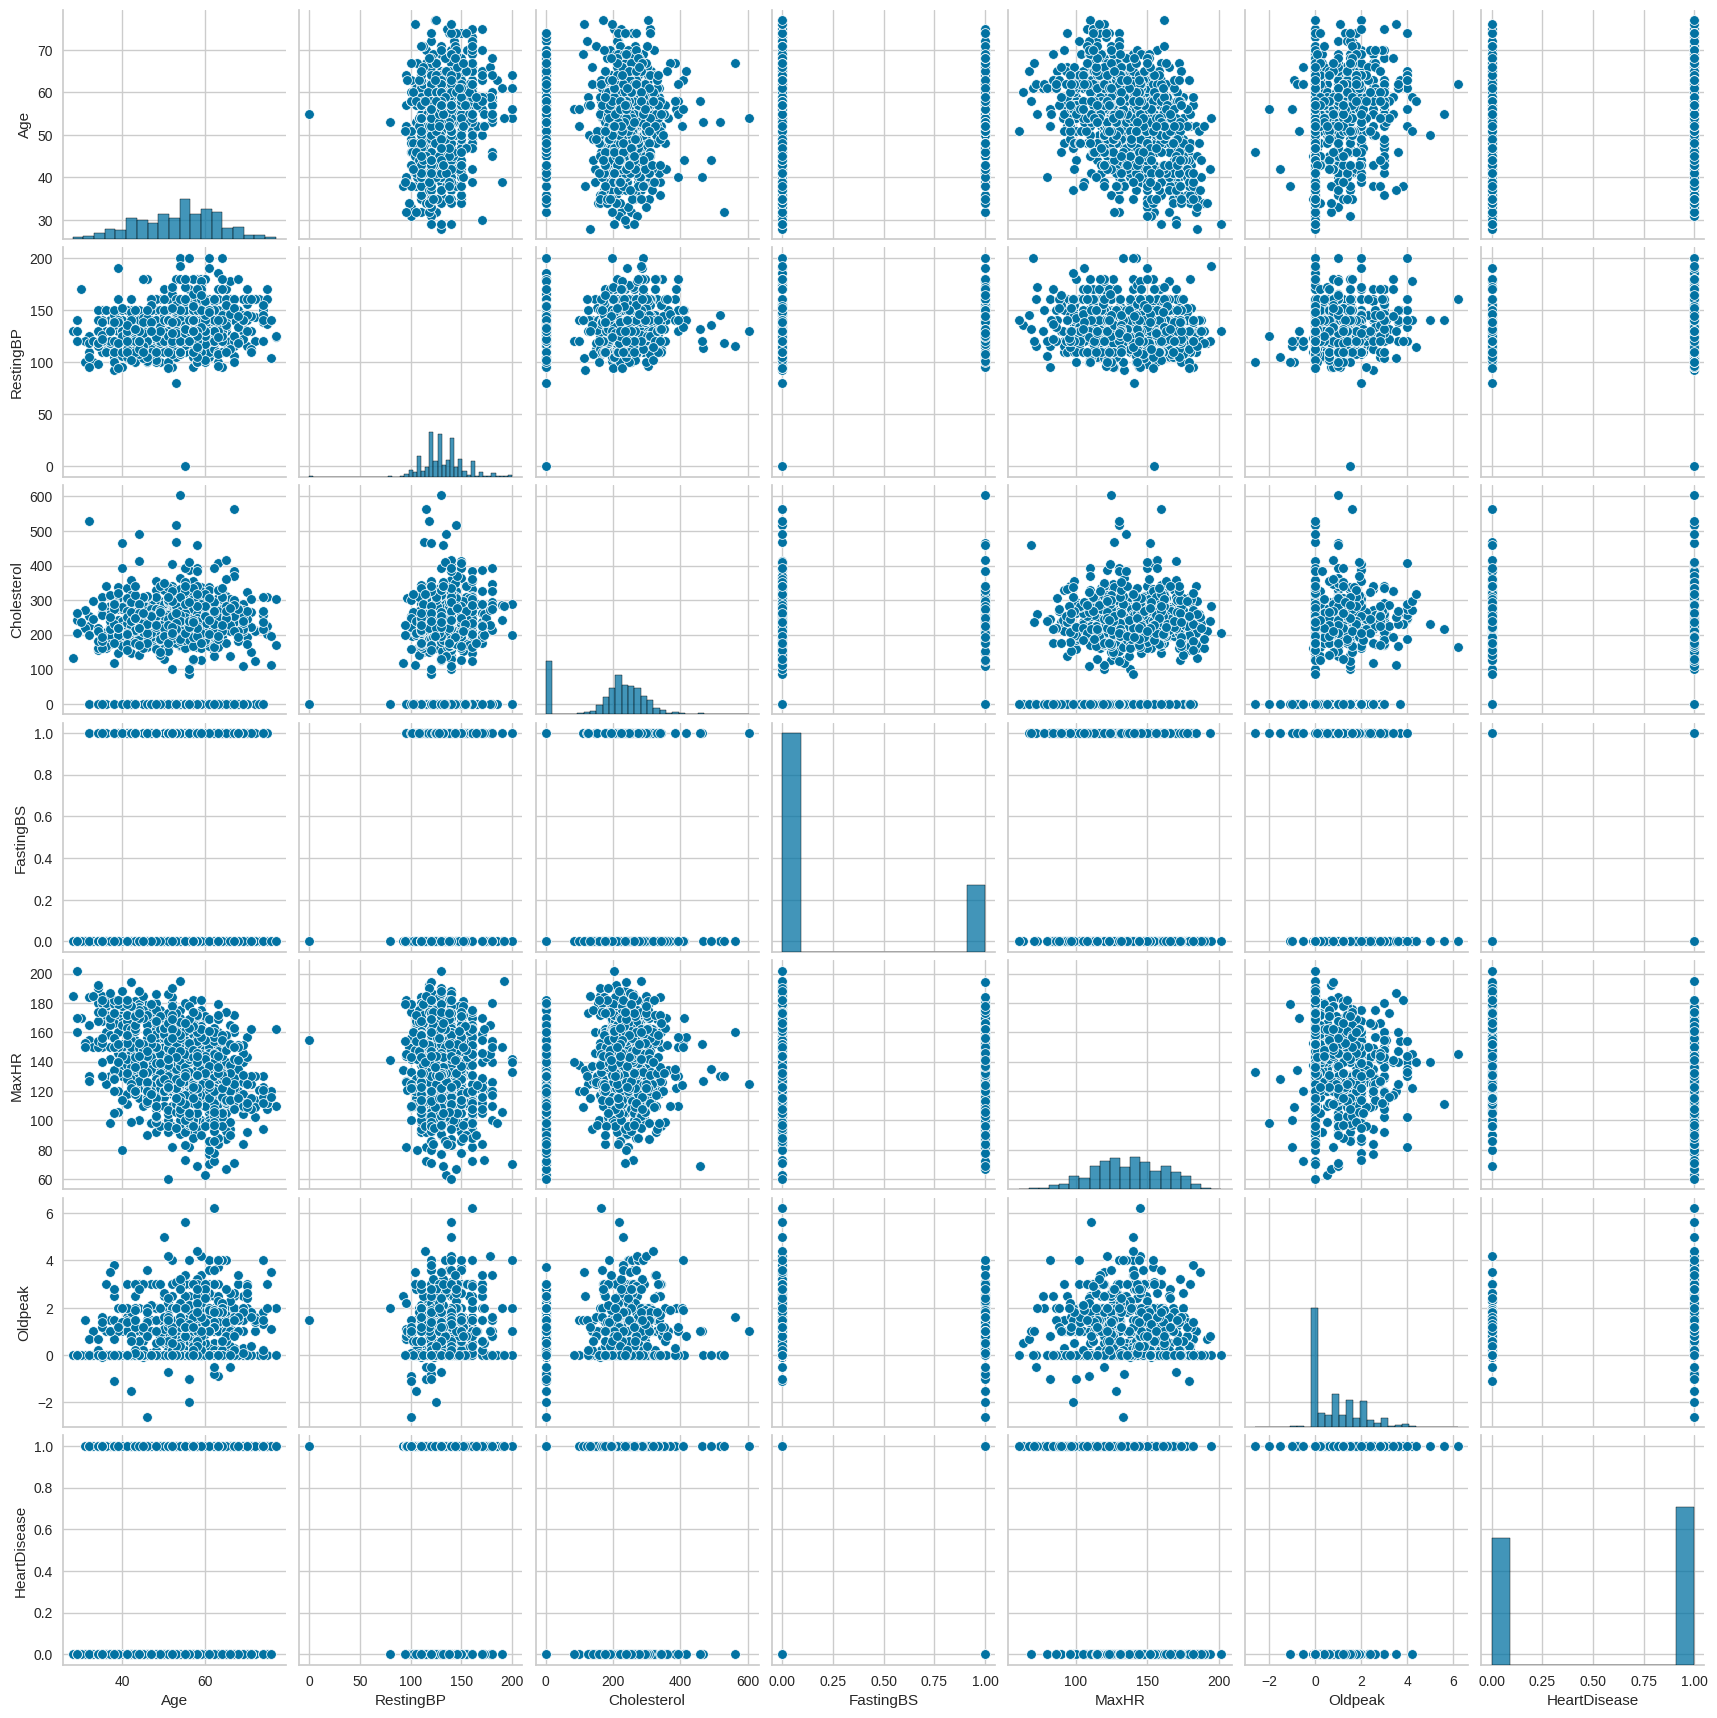

In [9]:
sns.pairplot(data)
plt.show()

In [10]:
#Once we've got categorical columns, let's convert them to numerical columns!
le_sex = LabelEncoder()
le_chestpaintype = LabelEncoder()
le_restingecg = LabelEncoder()
le_exerciseangina = LabelEncoder()
le_stslope = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['ChestPainType'] = le_chestpaintype .fit_transform(data['ChestPainType'])
data['RestingECG'] = le_restingecg.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le_exerciseangina.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le_stslope.fit_transform(data['ST_Slope'])

#Converting labels into pickle format

In [1]:
joblib.dump(le_sex, '../pickles/le_sex.pkl')
joblib.dump(le_chestpaintype, '../pickles/le_chestpaintype.pkl')
joblib.dump(le_restingecg, '../pickles/le_restingecg.pkl')
joblib.dump(le_exerciseangina, '../pickles/le_exerciseangina.pkl')
joblib.dump(le_stslope, '../pickles/le_stslope.pkl')


NameError: name 'joblib' is not defined

#Model Development

In [12]:
#First, let's setup our data into pycaret library, with HeartDisease as our target.
exp1 = pyc.setup(data, target='HeartDisease')


,Description,Value
0,Session id,5432
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(918, 12)"
5,Transformed train set shape,"(642, 12)"
6,Transformed test set shape,"(276, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [13]:
#We can see that we have 918 rows, in which 642 will be used for training and 276 for testing for all ML models in pycaret.
#Now, we will analyze all diferent ML models and let's compare each other, in order to get the best accuracy.
best_model = pyc.compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:40:53
Status,. . . . . . . . . . . . . . . . . .,Initializing CV
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8785,0.9273,0.8929,0.8892,0.8898,0.7543,0.7571,0.1080
et,Extra Trees Classifier,0.8724,0.9350,0.8904,0.8820,0.8850,0.7418,0.7444,0.1370
rf,Random Forest Classifier,0.8707,0.9263,0.9014,0.8711,0.8850,0.7375,0.7403,0.2390
ada,Ada Boost Classifier,0.8599,0.9021,0.8707,0.8786,0.8730,0.7169,0.7200,0.1120
nb,Naive Bayes,0.8583,0.9151,0.8761,0.8691,0.8722,0.7132,0.7141,0.0400
lightgbm,Light Gradient Boosting Machine,0.8568,0.9217,0.8902,0.8578,0.8725,0.7091,0.7126,21.7240
ridge,Ridge Classifier,0.8552,0.0000,0.8761,0.8652,0.8698,0.7067,0.7085,0.0790
lda,Linear Discriminant Analysis,0.8552,0.9160,0.8761,0.8652,0.8698,0.7067,0.7085,0.0360
lr,Logistic Regression,0.8537,0.9154,0.8817,0.8594,0.8694,0.7031,0.7058,0.8370
qda,Quadratic Discriminant Analysis,0.8427,0.9156,0.8619,0.8559,0.8585,0.6815,0.6823,0.0320


In [14]:
#We can see that Gradient Boosting model has better accuracy. Also, Random Forest Classifier shows a similar performance, so we can optimize both models.
#In this case, we will see Random Forest Classifier
final_model = pyc.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8923,0.9368,0.9167,0.8919,0.9041,0.7814,0.7817
1,0.8308,0.8937,0.8889,0.8205,0.8533,0.6541,0.6570
2,0.8750,0.9384,0.9429,0.8462,0.8919,0.7448,0.7509
3,0.8594,0.9084,0.9143,0.8421,0.8767,0.7137,0.7170
4,0.8750,0.9069,0.9429,0.8462,0.8919,0.7448,0.7509
5,0.8906,0.9498,0.9143,0.8889,0.9014,0.7787,0.7790
6,0.8125,0.8773,0.8000,0.8485,0.8235,0.6239,0.6251
7,0.9219,0.9370,0.8889,0.9697,0.9275,0.8431,0.8469
8,0.8594,0.9464,0.8611,0.8857,0.8732,0.7154,0.7158


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
#Now, our model will be tuned by tune_model function of Pycaret.
tuned_model = pyc.tune_model(final_model)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:44:56
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8923,0.9320,0.9167,0.8919,0.9041,0.7814,0.7817
1,0.8769,0.9090,0.8889,0.8889,0.8889,0.7510,0.7510
2,0.9219,0.9567,0.9714,0.8947,0.9315,0.8410,0.8448
3,0.8594,0.9222,0.9143,0.8421,0.8767,0.7137,0.7170
4,0.8750,0.9084,0.9429,0.8462,0.8919,0.7448,0.7509
5,0.8750,0.9517,0.8857,0.8857,0.8857,0.7478,0.7478
6,0.7969,0.8966,0.8286,0.8056,0.8169,0.5889,0.5892
7,0.9062,0.9405,0.8889,0.9412,0.9143,0.8110,0.8126
8,0.9062,0.9454,0.8889,0.9412,0.9143,0.8110,0.8126


Fitting 10 folds for each of 10 candidates, totalling 100 fits


#Prediction

In [16]:
#Now, based on our splitted data, we will predict our model.
predictions = pyc.predict_model(tuned_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8406,0.9197,0.8627,0.8516,0.8571,0.6768,0.6769


In [17]:
#Finally, we save the data in pickle format, so that will be used for the API.
pyc.save_model(tuned_model, 'modelo_final')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Sex', 'ChestPainType',
                                              'RestingBP', 'Cholesterol',
                                              'FastingBS', 'RestingECG', 'MaxHR',
                                              'ExerciseAngina', 'Oldpeak',
                                              'ST_Slope'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                